## 1. Load Sample Data

Load and inspect sample industrial data.

In [1]:
# Import required libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add parent directory to path to import IDS modules
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

In [2]:
# Create sample data
data = {
    'timestamp': pd.date_range('2026-01-01', periods=100, freq='H'),
    'temperature': np.random.normal(75, 5, 100),
    'pressure': np.random.normal(100, 10, 100),
    'flow_rate': np.random.normal(50, 8, 100)
}

df = pd.DataFrame(data)
df.head()

C:\Users\m.gandhi\AppData\Local\Temp\ipykernel_9868\396614990.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.date_range('2026-01-01', periods=100, freq='H'),


,timestamp,temperature,pressure,flow_rate
0,2026-01-01 00:00:00,74.693597,102.527838,36.556372
1,2026-01-01 01:00:00,87.940016,102.308607,44.393288
2,2026-01-01 02:00:00,74.636702,100.489347,37.608368
3,2026-01-01 03:00:00,70.729117,96.395514,51.239175
4,2026-01-01 04:00:00,71.106514,83.581865,61.526331


## 2. Data Statistics

Calculate basic statistics for the dataset.

In [3]:
# Display summary statistics
df.describe()

,timestamp,temperature,pressure,flow_rate
count,100,100.000000,100.000000,100.000000
mean,2026-01-03 01:30:00.000000256,74.983395,101.058760,50.708214
min,2026-01-01 00:00:00,61.198957,71.662147,31.408151
25%,2026-01-02 00:45:00,71.085891,96.060725,46.015737
50%,2026-01-03 01:30:00,74.750063,100.960663,51.509806
75%,2026-01-04 02:15:00,78.447127,107.955875,56.134406
max,2026-01-05 03:00:00,88.398634,125.240736,66.773311
std,NaN,5.446540,10.238478,7.686977


## 3. Data Visualization

Visualize the time series data.

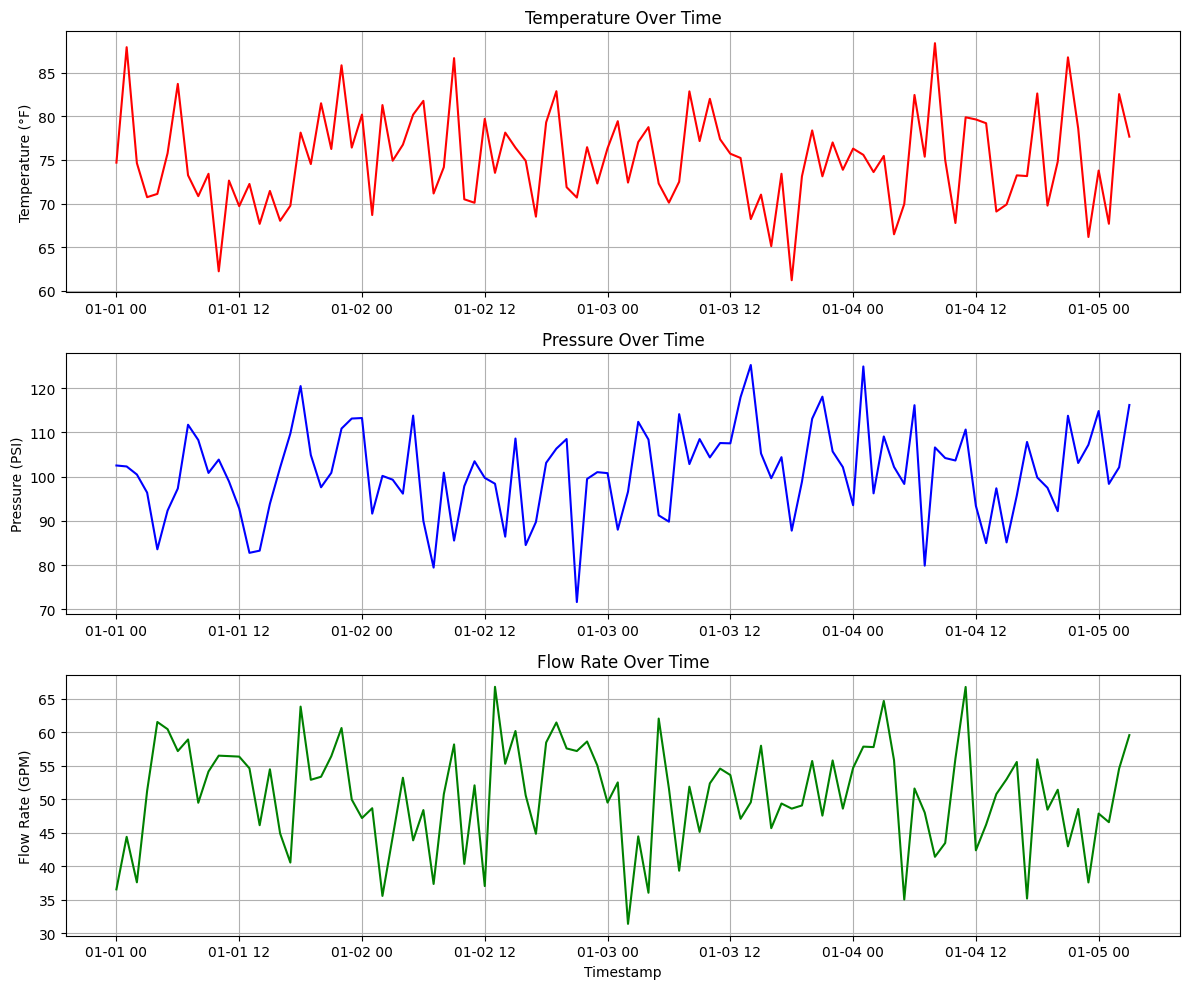

In [4]:
# Create subplots for each parameter
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

axes[0].plot(df['timestamp'], df['temperature'], color='red')
axes[0].set_ylabel('Temperature (°F)')
axes[0].set_title('Temperature Over Time')
axes[0].grid(True)

axes[1].plot(df['timestamp'], df['pressure'], color='blue')
axes[1].set_ylabel('Pressure (PSI)')
axes[1].set_title('Pressure Over Time')
axes[1].grid(True)

axes[2].plot(df['timestamp'], df['flow_rate'], color='green')
axes[2].set_ylabel('Flow Rate (GPM)')
axes[2].set_title('Flow Rate Over Time')
axes[2].set_xlabel('Timestamp')
axes[2].grid(True)

plt.tight_layout()
plt.show()

## 4. Anomaly Detection

Identify potential anomalies using simple threshold-based detection.

In [5]:
# Define thresholds (mean ± 2 standard deviations)
temp_threshold = df['temperature'].std() * 2
temp_mean = df['temperature'].mean()

# Identify anomalies
anomalies = df[
    (df['temperature'] > temp_mean + temp_threshold) | 
    (df['temperature'] < temp_mean - temp_threshold)
]

print(f"Found {len(anomalies)} anomalies")
anomalies

Found 6 anomalies


,timestamp,temperature,pressure,flow_rate
1,2026-01-01 01:00:00,87.940016,102.308607,44.393288
10,2026-01-01 10:00:00,62.223131,103.861229,56.501959
33,2026-01-02 09:00:00,86.682965,85.564303,58.176951
66,2026-01-03 18:00:00,61.198957,87.797989,48.601081
80,2026-01-04 08:00:00,88.398634,106.607844,41.412955
93,2026-01-04 21:00:00,86.774716,113.765993,42.974407


## 5. Export Results

Save processed data to CSV.

In [6]:
# Export to CSV
output_path = '../data/processed_data.csv'
df.to_csv(output_path, index=False)
print(f"Data exported to {output_path}")

Data exported to ../data/processed_data.csv
